In [1]:
#now implement the KD tree algorithm to optimize the algorithm#
import numpy as np
import time
from scipy import spatial 
single_b_val_img=np.zeros([128,128])

#*****Define the Parametric Points*****#
#define the dimensions of the volume#
dim1=128
dim2=128
dim3=128#this is the number of slices
t=np.linspace(0,10,128)
r=35
a=4*np.pi
helix_xs=r*(np.cos(t)+1.75)
helix_ys=r*(np.sin(t)+1.75)
helix_zs=a*t
helix_t_x=-r*np.sin(t)
helix_t_y=r*np.cos(t)#FIXME these may need to be translated as well since it's only in x and y, not z
helix_t_z=a*np.ones([len(helix_t_y)])
diffusion_tensors=[]
#****generate the normal directions for the second eigenvalue*****#
helix_n_x=-r*np.cos(t)
helix_n_y=-r*np.sin(t)
helix_n_z=np.zeros([len(helix_t_y)])
#********************************************************************************#



#*****Calculate the diffusion tensor corresponding to each point*****#
diag_diff_mat=[[1.5,0,0],[0,.6,0],[0,0,.2]]
diffusion_tensors=[]
for jj in range(len(helix_xs)):
    #cross the first and 2nd eigenvectors to get the third#
    first_eig=[helix_t_x[jj],helix_t_y[jj],helix_t_z[jj]]
    first_eig=np.array(first_eig/np.linalg.norm(first_eig))
    
    second_eig=[helix_n_x[jj],helix_n_y[jj],helix_n_z[jj]]
    second_eig=np.array(second_eig/np.linalg.norm(second_eig))
    
    third_eig=np.cross(first_eig,second_eig)
    third_eig=np.array(third_eig/np.linalg.norm(third_eig))
    #then multiply everything to get the diffusion tensor#
    U=np.array([[first_eig[0],second_eig[0],third_eig[0]],[first_eig[1],second_eig[1],third_eig[1]],[first_eig[2],second_eig[2],third_eig[2]]])
    UT=U.transpose()
    diffusion_tensor_temp=U.dot(diag_diff_mat).dot(UT)
    diffusion_tensors.append(diffusion_tensor_temp)
#********************************************************************************#


#****Generate the helix matrix for distance calculations****#
helix_matrix=np.zeros([len(helix_xs),3])
for jj in range(len(helix_xs)):
    helix_matrix[jj,0]=helix_xs[jj]
    helix_matrix[jj,1]=helix_ys[jj]
    helix_matrix[jj,2]=helix_zs[jj]
    
tree=spatial.KDTree(helix_matrix)




def gen_slice(gx,gy,gz,b_val,mag,z_coord):
    "this function will generate the slice of the simulation located at the z-coord"
    gg=z_coord
    b=b_val
    b_vec=[gx,gy,gz]/np.linalg.norm([gx,gy,gz])
    for jj in range(128):
        for kk in range(128):
            #now calculate the distance to all the points in the parametric equation#
             #check to see if the point is in the cylinder#
            if (jj-64)**2+(kk-64)**2<50**2:
                #by default, set this pixel intensity to mag#
                single_b_val_img[jj,kk]=mag
                #then check to see if it is close to the fiber budle, and allter the diffusion tensor accordingly 
                
                helix_dists=np.zeros(len(helix_xs))
                vox_loc=np.array([jj,kk,gg])
                pt=[jj,kk,gg]
                min_dist,crspndng_dt_idx=tree.query(pt)

                
                if min_dist<6:
                        #now get the diffusion tensor corresponding to that point#
                    DT_tmp=diffusion_tensors[crspndng_dt_idx]
                        #Now get the signal and assign that value to the volume#
                    vox_sig=mag*np.exp(-b*np.array(b_vec).dot(DT_tmp).dot(np.transpose(b_vec))) 

                        #now assign that value to the image#
                    single_b_val_img[jj,kk]=vox_sig
    return single_b_val_img



In [2]:
import multiprocessing as mp
import numpy as np
start_time=time.time()


pool = mp.Pool(processes=12)
results=[pool.apply_async(gen_slice,args=(1,0,0,3,10000,z_coord)) for z_coord in range(0,128)]
output = [p.get() for p in results]
s=time.time()-start_time;
print("With parallelization,and KDTree algorithm, the time is --- "+str(round(s,3))+" seconds ---" )











With parallelization,and KDTree algorithm, the time is --- 37.817 seconds ---


In [1]:
##Now run the program which generate the different b-directions and plug them in##
import math, random
import numpy as np

def fibonacci_sphere(samples=1,randomize=True):
    rnd = 1.
    if randomize:
        rnd = random.random() * samples

    points = []
    offset = 2./samples
    increment = math.pi * (3. - math.sqrt(5.));

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2);
        r = math.sqrt(1 - pow(y,2))

        phi = ((i + rnd) % samples) * increment

        x = math.cos(phi) * r
        z = math.sin(phi) * r

        points.append([x,y,z])

    return points
points=np.array(fibonacci_sphere(24,randomize=True))
x_pts=points[:,0]
y_pts=points[:,1]
z_pts=points[:,2]
#now plot them#
import numpy as np
from mayavi import mlab
def props(cls):   
    return [i for i in cls.__dict__.keys() if i[:1] != '_']
figure = mlab.gcf()
white_glyphs=mlab.points3d(x_pts,y_pts,z_pts,color=(1,1,1),resolution=20,scale_factor=.1)
mlab.show()

In [2]:
#Now shove all of them together#
#now implement the KD tree algorithm to optimize the algorithm#
import numpy as np
import time
from scipy import spatial 
single_b_val_img=np.zeros([128,128])
import multiprocessing as mp
start_time=time.time()


#*****Define the Parametric Points*****#
#define the dimensions of the volume#
dim1=128
dim2=128
dim3=128#this is the number of slices
t=np.linspace(0,10,128)
r=35
a=4*np.pi
helix_xs=r*(np.cos(t)+1.75)
helix_ys=r*(np.sin(t)+1.75)
helix_zs=a*t
helix_t_x=-r*np.sin(t)
helix_t_y=r*np.cos(t)#FIXME these may need to be translated as well since it's only in x and y, not z
helix_t_z=a*np.ones([len(helix_t_y)])
diffusion_tensors=[]
#****generate the normal directions for the second eigenvalue*****#
helix_n_x=-r*np.cos(t)
helix_n_y=-r*np.sin(t)
helix_n_z=np.zeros([len(helix_t_y)])
#********************************************************************************#



#*****Calculate the diffusion tensor corresponding to each point*****#
diag_diff_mat=[[1.5,0,0],[0,.6,0],[0,0,.2]]
diffusion_tensors=[]
for jj in range(len(helix_xs)):
    #cross the first and 2nd eigenvectors to get the third#
    first_eig=[helix_t_x[jj],helix_t_y[jj],helix_t_z[jj]]
    first_eig=np.array(first_eig/np.linalg.norm(first_eig))
    
    second_eig=[helix_n_x[jj],helix_n_y[jj],helix_n_z[jj]]
    second_eig=np.array(second_eig/np.linalg.norm(second_eig))
    
    third_eig=np.cross(first_eig,second_eig)
    third_eig=np.array(third_eig/np.linalg.norm(third_eig))
    #then multiply everything to get the diffusion tensor#
    U=np.array([[first_eig[0],second_eig[0],third_eig[0]],[first_eig[1],second_eig[1],third_eig[1]],[first_eig[2],second_eig[2],third_eig[2]]])
    UT=U.transpose()
    diffusion_tensor_temp=U.dot(diag_diff_mat).dot(UT)
    diffusion_tensors.append(diffusion_tensor_temp)
#********************************************************************************#


#****Generate the helix matrix for distance calculations****#
helix_matrix=np.zeros([len(helix_xs),3])
for jj in range(len(helix_xs)):
    helix_matrix[jj,0]=helix_xs[jj]
    helix_matrix[jj,1]=helix_ys[jj]
    helix_matrix[jj,2]=helix_zs[jj]
    
tree=spatial.KDTree(helix_matrix)

import math, random

def fibonacci_sphere(samples=1,randomize=True):
    rnd = 1.
    if randomize:
        rnd = random.random() * samples

    points = []
    offset = 2./samples
    increment = math.pi * (3. - math.sqrt(5.));

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2);
        r = math.sqrt(1 - pow(y,2))

        phi = ((i + rnd) % samples) * increment

        x = math.cos(phi) * r
        z = math.sin(phi) * r

        points.append([x,y,z])

    return points


def gen_slice(gx,gy,gz,b_val,mag,z_coord):
    "this function will generate the slice of the simulation located at the z-coord"
    gg=z_coord
    b=b_val
    if [gx,gy,gz]!=[0,0,0]:
        b_vec=[gx,gy,gz]/np.linalg.norm([gx,gy,gz])
    else:
        b_vec=[gx,gy,gz]
    for jj in range(128):
        for kk in range(128):
            #now calculate the distance to all the points in the parametric equation#
             #check to see if the point is in the cylinder#
            if (jj-64)**2+(kk-64)**2<50**2:
                #by default, set this pixel intensity to mag#
                single_b_val_img[jj,kk]=mag
                #then check to see if it is close to the fiber budle, and allter the diffusion tensor accordingly 
                
                helix_dists=np.zeros(len(helix_xs))
                vox_loc=np.array([jj,kk,gg])
                pt=[jj,kk,gg]
                min_dist,crspndng_dt_idx=tree.query(pt)

                
                if min_dist<6:
                        #now get the diffusion tensor corresponding to that point#
                    DT_tmp=diffusion_tensors[crspndng_dt_idx]
                        #Now get the signal and assign that value to the volume#
                    vox_sig=mag*np.exp(-b*np.array(b_vec).dot(DT_tmp).dot(np.transpose(b_vec))) 

                        #now assign that value to the image#
                    single_b_val_img[jj,kk]=vox_sig
    return single_b_val_img

num_dirs=12
b_matrix=np.array(fibonacci_sphere(num_dirs,randomize=True))
b_matrix=np.append([0,0,0],b_matrix)
b_matrix=np.reshape(b_matrix,[-1,3])

image_stack=np.zeros([num_dirs+1,128,128,128])


x_b_vec=b_matrix[:,0]
y_b_vec=b_matrix[:,1]
z_b_vec=b_matrix[:,2]





for jj in range(num_dirs+1):
    pool = mp.Pool(processes=12)
    results=[pool.apply_async(gen_slice,args=(x_b_vec[jj],y_b_vec[jj],z_b_vec[jj],3,10000,z_coord)) for z_coord in range(0,128)]
    output = [p.get() for p in results]
    image_stack[jj,:,:,:]=np.array(output)
    pool.close()



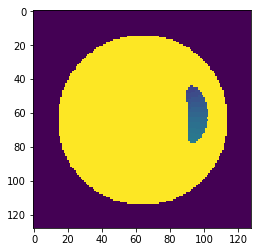

In [12]:
import matplotlib.pyplot as plt
plt.imshow(np.array(image_stack)[3,20,:,:])
plt.show()

np.save('test_dwi_imgs',image_stack)
np.save('test_b-table',b_matrix)

In [104]:
from scipy.ndimage import gaussian_filter
blurred_image_stack=np.zeros(np.shape(image_stack))
for jj in range(13):
    for kk in range(128):
        blurred_image_stack[jj,kk,:,:]=gaussian_filter(image_stack[jj,kk,:,:],sigma=3)



In [70]:
import numpy as np
noisy_image_stack=np.zeros(np.shape(image_stack))
for jj in range(13):
    for kk in range(128):
         noise = np.random.normal(0,500,[128,128])
         noisy_image_stack[jj,kk,:,:]=image_stack[jj,kk,:,:]+noise





In [71]:
np.save("noisy_DWI_Stack.npy",np.abs(noisy_image_stack))

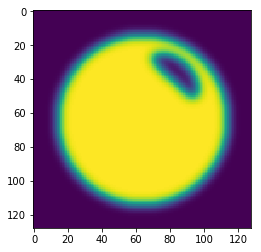

In [105]:
plt.imshow(blurred_image_stack[1,30,:,:])
plt.show()

In [137]:
.4*5

2.0